In [18]:
import argparse
import numpy as np
import networkx as nx
import slam.plot as splt
import slam.topology as stop
import slam.generate_parametric_surfaces as sgps
import trimesh
import os

In [20]:
nb_runs = 10
nb_graphs = 3
nb_vertices = 85
min_noise = 50
max_noise = 51
step_noise = 20
min_outliers = 10
max_outliers = 11
step_outliers = 10
save_reference = 1
radius = 100

In [11]:
list_noise = np.arange(min_noise, max_noise, step_noise)

In [8]:
list_outliers = np.array(list(range(min_outliers, max_outliers, step_outliers)))

In [17]:
for noise in list_noise:
    for outliers in list_outliers:
        print(outliers,noise)

10 50


In [21]:
sphere_random = sgps.generate_sphere_random_sampling(vertex_number=nb_vertices, radius=radius)

In [30]:
sphere_random

<trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(166, 3))>

In [23]:
adja = stop.edges_to_adjacency_matrix(sphere_random)

In [31]:
mm = adja.todense()

In [36]:
mm[0,:]

matrix([[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         0]], dtype=int8)

In [37]:
graph = nx.from_numpy_matrix(adja.todense())

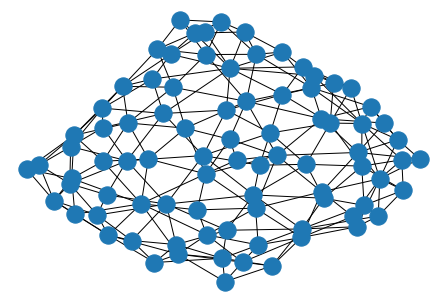

In [40]:
nx.draw(graph)

In [42]:
nx.adjacency_matrix(graph).todense()

matrix([[0, 0, 2, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [47]:
nx.degree(graph)

DegreeView({0: 8, 1: 9, 2: 5, 3: 4, 4: 6, 5: 5, 6: 6, 7: 9, 8: 6, 9: 7, 10: 4, 11: 4, 12: 6, 13: 6, 14: 4, 15: 8, 16: 6, 17: 7, 18: 8, 19: 7, 20: 6, 21: 3, 22: 7, 23: 7, 24: 6, 25: 6, 26: 7, 27: 5, 28: 6, 29: 6, 30: 10, 31: 5, 32: 5, 33: 7, 34: 5, 35: 8, 36: 5, 37: 7, 38: 6, 39: 4, 40: 5, 41: 6, 42: 5, 43: 5, 44: 5, 45: 6, 46: 8, 47: 4, 48: 4, 49: 9, 50: 5, 51: 6, 52: 7, 53: 5, 54: 3, 55: 6, 56: 7, 57: 7, 58: 7, 59: 4, 60: 7, 61: 6, 62: 4, 63: 4, 64: 5, 65: 5, 66: 6, 67: 5, 68: 3, 69: 8, 70: 6, 71: 5, 72: 5, 73: 7, 74: 6, 75: 6, 76: 5, 77: 4, 78: 7, 79: 5, 80: 5, 81: 11, 82: 4, 83: 4, 84: 5})

In [53]:
graph.number_of_nodes()

85

In [56]:
def geodesic_distance_sphere(coord_a, coord_b, radius):
    ''' Return the geodesic distance of two 3D vectors on a sphere
    '''
    return radius * np.arccos(np.clip(np.dot(coord_a, coord_b) / np.power(radius,2),-1,1))

def graph_from_mesh(mesh):
    # Get the adjacency graph
    #########################################################
    # that fucking function is bugged!!!!!!!!!!!!!!!!!!!!
    # graph = sphere_random_sampling.vertex_adjacency_graph
    #########################################################
    adja = stop.edges_to_adjacency_matrix(mesh)
    graph = nx.from_numpy_matrix(adja.todense())
    # to be tested graph = nx.from_edgelist(sphere_random_sampling.edges_sorted)

    # Create dictionnary that will hold the attributes of each node
    node_attribute_dict = {}
    for node in graph.nodes():
        node_attribute_dict[node] = {"coord": np.array(mesh.vertices[node])}

    # add the node attributes to the graph
    nx.set_node_attributes(graph, node_attribute_dict)

    # We add a default weight on each edge of 1
    nx.set_edge_attributes(graph, 1.0, name="weight")

    # We add a geodesic distance between the two ends of an edge
    edge_attribute_dict = {}
    id_counter = 0 # useful for affinity matrix caculation
    for edge in graph.edges:

        # We calculate the geodesic distance
        end_a = graph.nodes()[edge[0]]["coord"]
        end_b = graph.nodes()[edge[1]]["coord"]
        geodesic_dist = geodesic_distance_sphere(end_a, end_b, radius)

        # add the information in the dictionnary
        edge_attribute_dict[edge] = {"geodesic_distance": geodesic_dist, "id":id_counter}
        id_counter += 1

    # add the edge attributes to the graph
    nx.set_edge_attributes(graph, edge_attribute_dict)
    return graph

In [62]:
simu_graph = graph_from_mesh(sphere_random)

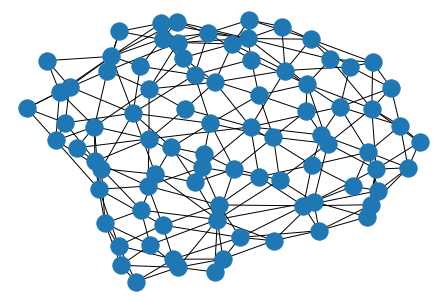

In [63]:
nx.draw(simu_graph)

In [71]:
#nx.get_edge_attributes(simu_graph,"geodesic_distance")